In [1]:
pip install ecg_plot

Note: you may need to restart the kernel to use updated packages.


<Figure size 1600x1000 with 0 Axes>

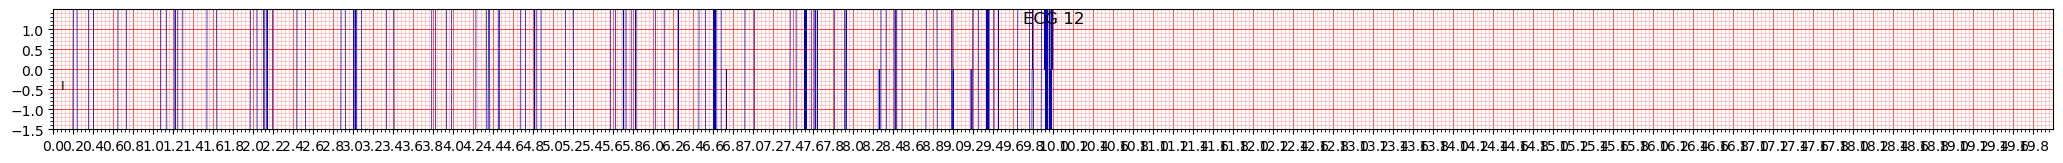

In [23]:
import ecg_plot
import pickle
import numpy as np
import matplotlib.pyplot as plt

ecg_path = '../../Desktop/user_ecg/3_data.pkl'

with open(ecg_path, 'rb') as f:
    ecg_data = pickle.load(f)

# ECG 데이터 추출하여 ecg 변수로 변환
ecg = np.array([ecg_data['I']])

plt.figure(figsize=(16, 10))

# ECG 그래프 그리기
ecg_plot.plot(ecg, sample_rate=500, title='ECG 12')

# 그리드 추가
plt.grid(True)

# 그래프 보여주기
plt.show()


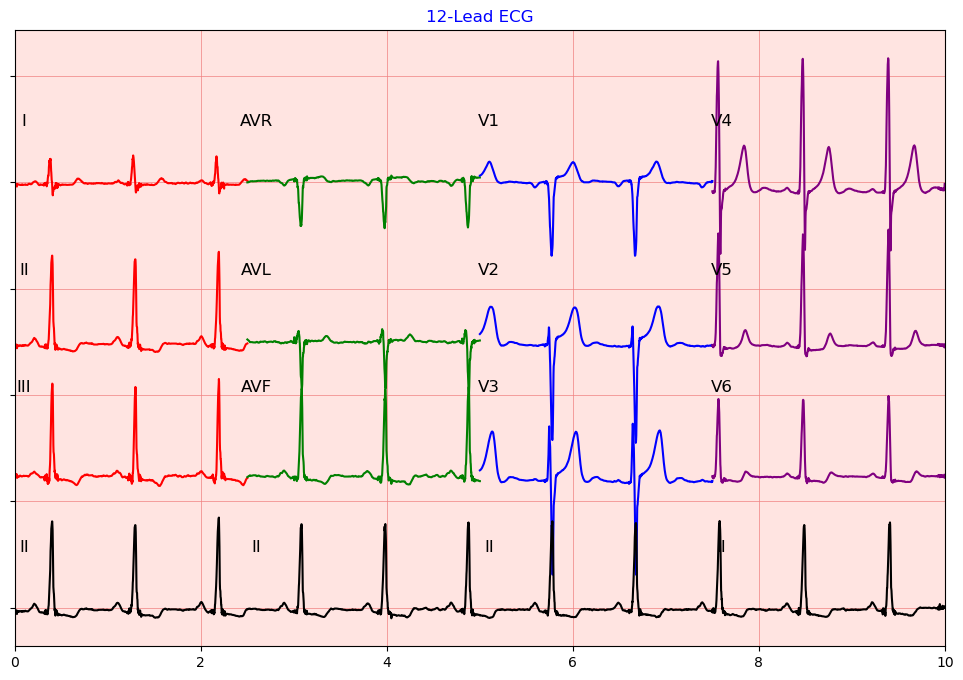

In [28]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
ecg_path = f'../../Desktop/user_ecg/3_data.pkl'

with open(ecg_path, 'rb') as f:
    ecg_data = pickle.load(f)

time_data = np.arange(len(ecg_data['I'])) / 500.0
# 그래프 크기 조절
plt.figure(figsize=(12,8))
colors_3 = ['black', 'black', 'black', 'black']

# 바탕색과 grid 추가
plt.gca().set_facecolor('mistyrose')
plt.grid(color='lightcoral', linestyle='-', linewidth=0.5)

# 리드 이름과 색상 설정
lead_names = ['I', 'AVR', 'V1', 'V4']
colors = ['red', 'green', 'blue', 'purple']
start_time = 0
for i, lead_name in enumerate(lead_names):
    lead_data = ecg_data[lead_name] + 8000
    end_time = start_time + 2.5
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors[color_idx], label=lead_name)
    plt.text(start_time + 0.1, 9000, lead_name, fontsize=12, color=colors_3[color_idx], ha='center', va='bottom')  # lead_name 표시 (고정된 y값인 4000 사용)
    start_time = end_time  # 다음 리드의 시작 시간으로 갱신



# 리드 이름과 색상 설정
lead_names_1 = ['II', 'AVL', 'V2', 'V5']
colors_1 = ['red', 'green', 'blue', 'purple']
start_time = 0
for i, lead_name in enumerate(lead_names_1):
    lead_data = ecg_data[lead_name] + 5000
    end_time = start_time + 2.5
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors_1[color_idx], label=lead_name)
    plt.text(start_time + 0.1, 6200, lead_name, fontsize=12, color=colors_3[color_idx], ha='center', va='bottom')  # lead_name 표시 (고정된 y값인 4000 사용)
    start_time = end_time  # 다음 리드의 시작 시간으로 갱신   


# 첫 번째 그래프 그리기
lead_names_2 = ['III', 'AVF', 'V3', 'V6']
colors_2 = ['red', 'green', 'blue', 'purple']
start_time = 0
for i, lead_name in enumerate(lead_names_2):
    lead_data = ecg_data[lead_name] + 2500  # y축 값에 2500을 더하기
    end_time = start_time + 2.5
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors_2[color_idx], label=lead_name)
    plt.text(start_time + 0.1, 4000, lead_name, fontsize=12, color=colors_3[color_idx], ha='center', va='bottom')  # lead_name 표시 (고정된 y값인 4000 사용)
    start_time = end_time

# 두 번째 그래프 그리기
lead_names_3 = ['II', 'II', 'II', 'II']
colors_3 = ['black', 'black', 'black', 'black']
start_time = 0
for i, lead_name in enumerate(lead_names_3):
    lead_data = ecg_data[lead_name]
    end_time = start_time + 2.5
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors_3[color_idx], label=lead_name)
    plt.text(start_time + 0.1, 1000, lead_name, fontsize=12, color=colors_3[color_idx], ha='center', va='bottom')  # lead_name 표시 (고정된 y값인 4000 사용)
    start_time = end_time

plt.title('12-Lead ECG', color='blue')
plt.gca().set_yticklabels([])
plt.xlim(0, 10)  # x 축 범위 지정

plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import os
from math import ceil 


def _ax_plot(ax, x, y, secs=10, lwidth=0.5, amplitude_ecg = 1.8, time_ticks =0.2):
    ax.set_xticks(np.arange(0,11,time_ticks))    
    ax.set_yticks(np.arange(-ceil(amplitude_ecg),ceil(amplitude_ecg),1.0))

    #ax.set_yticklabels([])
    #ax.set_xticklabels([])

    ax.minorticks_on()
    
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

    ax.set_ylim(-amplitude_ecg, amplitude_ecg)
    ax.set_xlim(0, secs)

    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color=(1, 0.7, 0.7))

    ax.plot(x,y, linewidth=lwidth)


lead_index = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
def plot_12(
        ecg, 
        sample_rate = 500, 
        title       = 'ECG 12', 
        lead_index  = lead_index, 
        lead_order  = None,
        columns     = 2,
        speed = 50,
        voltage = 20,
        line_width = 0.6
        ):

    if not lead_order:
        lead_order = list(range(0,len(ecg)))

    leads = len(lead_order)
    seconds = len(ecg[0])/sample_rate

    plt.rcParams.update({'font.size': 8})
    fig, ax = plt.subplots(
        ceil(len(lead_order)/columns),columns,
        sharex=True, 
        sharey=True,
        figsize=((speed/25)*seconds*columns,    # 1 inch= 25,4 mm. Rounded to 25 for simplicity
            (4.1*voltage/25)*leads/columns)     # 1 subplot usually contains values in range of (-2,2) mV
        )
    fig.subplots_adjust(
        hspace = 0, 
        wspace = 0.04,
        left   = 0.04,  # the left side of the subplots of the figure
        right  = 0.98,  # the right side of the subplots of the figure
        bottom = 0.06,  # the bottom of the subplots of the figure
        top    = 0.95
        )
    fig.suptitle(title)

    step = 1.0/sample_rate

    for i in range(0, len(lead_order)):
        if(columns == 1):
            t_ax = ax[i]
        else:
            t_ax = ax[i//columns,i%columns]
        t_lead = lead_order[i]
        t_ax.set_ylabel(lead_index[t_lead])
        t_ax.tick_params(axis='x',rotation=90)
       
        _ax_plot(t_ax, np.arange(0, len(ecg[t_lead])*step, step), ecg[t_lead], seconds)

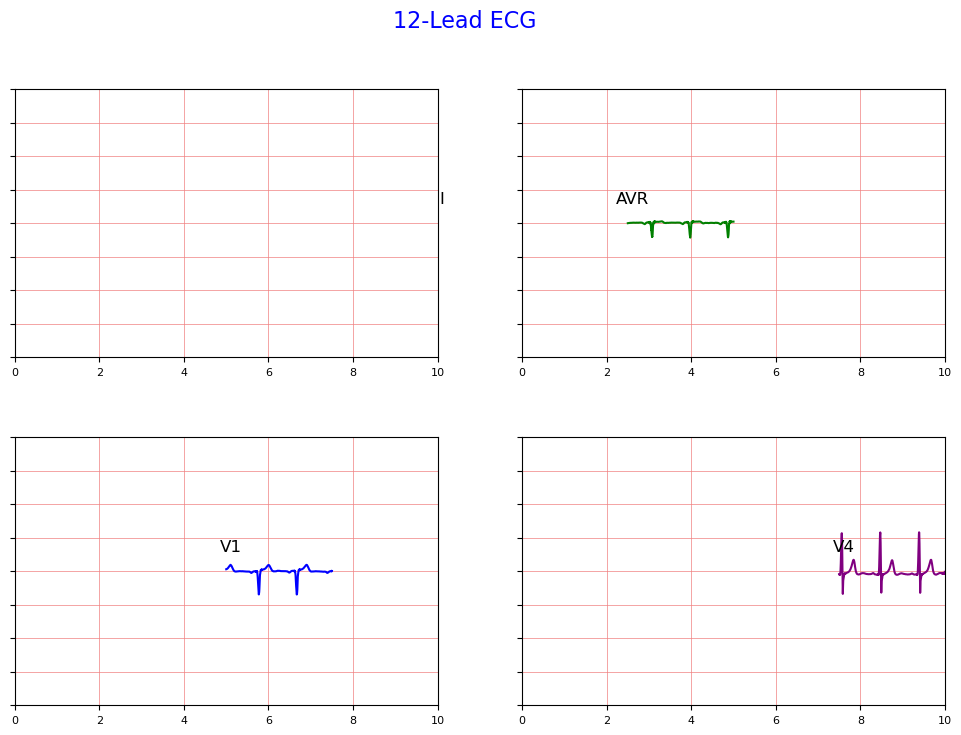

In [50]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
    
ecg_path = f'../../Desktop/user_ecg/3_data.pkl'

with open(ecg_path, 'rb') as f:
    ecg_data = pickle.load(f)

time_data = np.arange(len(ecg_data['I'])) / 500.0

# 그래프 크기 조절
plt.figure(figsize=(12, 8))

# 바탕색과 grid 추가
plt.gca().set_facecolor('mistyrose')

lead_names = ['I', 'AVR', 'V1', 'V4']
colors = ['red', 'green', 'blue', 'purple']
grid_color = 'lightcoral'
grid_linestyle = '-'

# 개별 리드 그래프 그리기
for i, lead_name in enumerate(lead_names):
    lead_data = ecg_data[lead_name] + 8000
    end_time = (i + 1) * 2.5
    plt.subplot(2, 2, i+1)  # 2x2 서브플롯 생성
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors[i], label=lead_name)
    plt.text(start_time + 0.1, 9000, lead_name, fontsize=12, color='black', ha='center', va='bottom')  # lead_name 표시
    # 그래프 간격을 좁히기 위해 서브플롯마다 grid 따로 그리기
    plt.gca().grid(color=grid_color, linestyle=grid_linestyle, linewidth=0.5)
    plt.xlim(0, 10)  # x 축 범위 지정
    plt.ylim(0, 16000)  # y 축 범위 지정
    plt.gca().set_yticklabels([])  # y 축 라벨 숨기기
    start_time = end_time  # 다음 리드의 시작 시간으로 갱신

plt.suptitle('12-Lead ECG', color='blue', fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.3)  # 서브플롯 간격 조정
plt.show()
